In [52]:
import pandas as pd
from pandas.io.json import json_normalize 
import requests
import json
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp

## 소환사의 정보 불러오기

In [58]:
api_key = "RGAPI-a1a815b6-8436-4d1f-b12f-67afccffc445"
user_name = input("알고 싶은 소환사의 아이디를 입력해주세요: ")
user_url = f"https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/{user_name}?api_key={api_key}"

r = requests.get(user_url)
r.json()['id'] #소환사의 고유 id

tier_url = "https://kr.api.riotgames.com/lol/league/v4/entries/by-summoner/" + r.json()['id'] +'?api_key=' + api_key
r2 = requests.get(tier_url)
r2.json()

알고 싶은 소환사의 아이디를 입력해주세요: hide on bush


[{'leagueId': '05fb99f4-e149-3133-a78e-821597582f9d',
  'queueType': 'RANKED_SOLO_5x5',
  'tier': 'CHALLENGER',
  'rank': 'I',
  'summonerId': 'dxw0ItebPX13iF9iQj--WdQrIQ-45jE2mCkdtsdiUwV6xA',
  'summonerName': 'Hide on bush',
  'leaguePoints': 934,
  'wins': 321,
  'losses': 280,
  'veteran': True,
  'inactive': False,
  'freshBlood': False,
  'hotStreak': False}]

## 챔피언 정보 불러오기
https://www.kaggle.com/code/gyejr95/how-to-use-item-champion-riot-api

In [59]:
# json으로 챔피언 정보 불러오기
response = requests.get('http://ddragon.leagueoflegends.com/cdn/10.6.1/data/ko_KR/champion.json')
champ_list = list(response.json()['data'].keys())

# 챔피언 정보 데이터프레임 생성
champ_df = pd.DataFrame()
for i in range(len(champ_list)):
    pre_df = pd.json_normalize(response.json()['data'][champ_list[i]])
    champ_df = champ_df.append(pre_df)
champ_df.shape

(148, 39)

In [60]:
champ_df.head()

,version,id,key,name,title,blurb,tags,partype,info.attack,info.defense,...,stats.hpregen,stats.hpregenperlevel,stats.mpregen,stats.mpregenperlevel,stats.crit,stats.critperlevel,stats.attackdamage,stats.attackdamageperlevel,stats.attackspeedperlevel,stats.attackspeed
0,10.6.1,Aatrox,266,아트록스,다르킨의 검,한때는 공허에 맞서 싸웠던 슈리마의 명예로운 수호자 아트록스와 그의 종족은 결국 공...,"[Fighter, Tank]",피의 샘,8,4,...,3.0,1.00,0.000,0.000,0,0,60.00,5.00,2.500,0.651
0,10.6.1,Ahri,103,아리,구미호,룬테라가 가진 잠재력과 선천적으로 연결된 아리는 마법을 순수한 에너지의 구체로 변환...,"[Mage, Assassin]",마나,3,4,...,6.5,0.60,8.000,0.800,0,0,53.04,3.00,2.000,0.668
0,10.6.1,Akali,84,아칼리,섬기는 이 없는 암살자,킨코우 결사단과 그림자의 권이라는 지위를 버린 아칼리는 아이오니아인들에게 필요한 강...,[Assassin],기력,5,3,...,8.0,0.50,50.000,0.000,0,0,62.40,3.30,3.200,0.625
0,10.6.1,Alistar,12,알리스타,미노타우로스,비할 데 없이 강력한 전사라는 평판이 자자한 알리스타는 녹서스 제국에게 부족 전체가...,"[Tank, Support]",마나,6,9,...,8.5,0.85,8.500,0.800,0,0,62.00,3.75,2.125,0.625
0,10.6.1,Amumu,32,아무무,슬픈 미라,뼛속까지 사무치는 외로움과 쓸쓸함 속에 살아가는 아무무. 평생을 오로지 마음을 나눌...,"[Tank, Mage]",마나,2,6,...,9.0,0.85,7.382,0.525,0,0,53.38,3.80,2.180,0.736


<AxesSubplot:xlabel='stats.hp', ylabel='stats.attackdamage'>

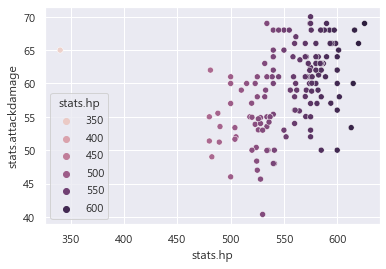

In [61]:
# 챔피언 타입별 hp 분포 분석

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지
sns.scatterplot(data=champ_df, x="stats.hp" ,y="stats.attackdamage", hue="stats.hp")

In [62]:
r.json()['id'] 

'dxw0ItebPX13iF9iQj--WdQrIQ-45jE2mCkdtsdiUwV6xA'

In [ ]:
mastery_url = https://kr.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/"+ r.json()['id'] + "?api_key=" + RGAPI-a1a815b6-8436-4d1f-b12f-67afccffc445